<a href="https://colab.research.google.com/github/Bhagya-laxmi/Noc-based-CNN/blob/master/LeNet_arch/Pretrained_LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1. Download MNIST dataset

#Four files are available on this site, http://yann.lecun.com/exdb/mnist/:

    #train-images-idx3-ubyte.gz: training set images (9912422 bytes)
    #train-labels-idx1-ubyte.gz: training set labels (28881 bytes)
    #t10k-images-idx3-ubyte.gz: test set images (1648877 bytes)
    #t10k-labels-idx1-ubyte.gz: test set labels (4542 bytes)

from requests import get

def download_file(url, file_name):
    with open(file_name, "wb") as file:
        response = get(url)
        file.write(response.content)

In [ ]:
download_file('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz', 'train-images-idx3-ubyte.gz')
download_file('http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz', 'train-labels-idx1-ubyte.gz')
download_file('http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz', 't10k-images-idx3-ubyte.gz')
download_file('http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz', 't10k-labels-idx1-ubyte.gz')

In [ ]:
!pip install seaborn==0.9.0

     |████████████████████████████████| 215kB 8.2MB/s 
  Found existing installation: seaborn 0.11.0
    Uninstalling seaborn-0.11.0:
      Successfully uninstalled seaborn-0.11.0


In [ ]:
import gzip
import numpy as np
import pandas as pd
from time import time

from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
import keras.layers as layers
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.callbacks import TensorBoard

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def read_mnist(images_path: str, labels_path: str):
    with gzip.open(labels_path, 'rb') as labelsFile:
        labels = np.frombuffer(labelsFile.read(), dtype=np.uint8, offset=8)

    with gzip.open(images_path,'rb') as imagesFile:
        length = len(labels)
        # Load flat 28x28 px images (784 px), and convert them to 28x28 px
        features = np.frombuffer(imagesFile.read(), dtype=np.uint8, offset=16) \
                        .reshape(length, 784) \
                        .reshape(length, 28, 28, 1)
        
    return features, labels

In [ ]:
train = {}
test = {}

train['features'], train['labels'] = read_mnist('train-images-idx3-ubyte.gz', 'train-labels-idx1-ubyte.gz')
test['features'], test['labels'] = read_mnist('t10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz')

In [ ]:
#Exploring the Data
print('# of training images:', train['features'].shape[0])
print('# of test images:', test['features'].shape[0])
print(train['features'].shape[3]) #60000 examples of images of size 28 x28x 1
print(train['features'][0].shape)
print(train['features'].shape) #(60000, 28, 28, 1)
train['labels'][0]
print(train['features'][0][0][0])

# of training images: 60000
# of test images: 10000
1
(28, 28, 1)
(60000, 28, 28, 1)
[0]


In [ ]:
#Display images
def display_image(position):
   # print(train['features'][position])
    image = train['features'][position].squeeze()
    plt.title('Example %d. Label: %d' % (position, train['labels'][position]))
    plt.imshow(image, cmap=plt.cm.gray_r)

In [ ]:
validation = {}
train['features'], validation['features'], train['labels'], validation['labels'] = train_test_split(train['features'], train['labels'], test_size=0.2, random_state=0)

In [ ]:
#Preparing Input data for Lenet

# Pad images with 0s

train['features']      = np.pad(train['features'], ((0,0),(2,2),(2,2),(0,0)), 'constant')
validation['features'] = np.pad(validation['features'], ((0,0),(2,2),(2,2),(0,0)), 'constant')
test['features']       = np.pad(test['features'], ((0,0),(2,2),(2,2),(0,0)), 'constant')
    
print("Updated Image Shape: {}".format(train['features'][0].shape))

Updated Image Shape: (32, 32, 1)


In [ ]:
from keras.models import load_model
new_model = load_model('myModel.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [ ]:
new_model.get_weights()

(1, 32, 32, 1)
[7]


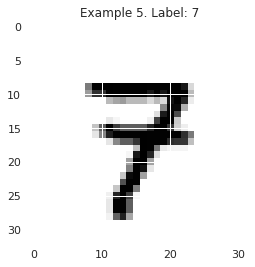

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

display_image(5)
samples_to_predict = np.array(train['features'][5:6])
print(samples_to_predict.shape)

predictions = new_model.predict(train['features'][5:6])

#print(predictions)

#print(train['labels'][1])

classes = np.argmax(predictions, axis = 1)
#numpy.savetxt('predict.txt', classes, fmt="%d")
print(classes)

In [ ]:
#Reading Input text file

array_from_file = np.loadtxt("Input_trial.txt", dtype=np.uint8).reshape(1,32,32,1)
print(array_from_file.shape)
saveInput = array_from_file[0,:,:,0]
with open("Input.txt", "w") as f:
      numpy.savetxt(f, saveInput)

(1, 32, 32, 1)


In [ ]:
def display_fromfile(data_file):
   # print(train['features'][position])
    image = data_file.squeeze()
    #plt.title('Example %d. Label: %d' % (position, train['labels'][position]))
    plt.imshow(image, cmap=plt.cm.gray_r)

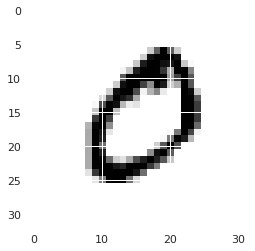

In [ ]:
display_fromfile(array_from_file)

In [ ]:
def display_fromarray(data_file):
   # print(train['features'][position])
    image = data_file
    #plt.title('Example %d. Label: %d' % (position, train['labels'][position]))
    plt.imshow(image, cmap=plt.cm.gray_r)

In [ ]:
#save output of each layer
from tensorflow import keras
from tensorflow.keras import layers
import numpy

#layer = model.get_layer('dense_1')
#print(layer)
extractor = keras.Model(inputs=new_model.inputs,
                        outputs=new_model.layers[7].output)#outputs=[layer.output for layer in new_model.layers])
#features = extractor(train['features'][5:6])
features = extractor(array_from_file)
print(features.shape)
#checking = features[0,:,:,15]
#print(checking.shape)
#display_fromarray(checking)
#print(checking)

#with open("Pool2_15.txt", "w") as f:
#      numpy.savetxt(f, checking)

checking = features[0,:]
print(checking.shape)
#display_fromarray(checking)
#print(checking)

with open("Output.txt", "w") as f:
      numpy.savetxt(f, checking)

#display_fromfile(checking)
#(l,x,y,z) = features.shape;
#for i in range (0,z):
 # for j in range (0,x):
    #print(features[0,,:,i])

#print(features[0,:])
#numpy.savetxt('Check2.txt', features, fmt="%s")

(1, 10)
(10,)


In [ ]:
print(train['features'][5:6].shape)

(1, 32, 32, 1)


In [ ]:
pip install hdfviewer

In [ ]:
import h5py
import numpy
from hdfviewer.widgets.HDFViewer import HDFViewer

hdf5 = h5py.File("/content/weights.h5","r");


In [ ]:
dense = hdf5['dense']
(x,y) = dense['dense']['kernel:0'].shape #(x,y) = (120,84)
for i in range(0,y):
  a = dense['dense']['kernel:0'][:,i]
  with open("Dense_120.txt", "ab") as f:
    f.write(b"\n")
    numpy.savetxt(f, a)

In [ ]:
import numpy as np

dense = hdf5['dense']
(x,y) = dense['dense']['kernel:0'].shape
print( x,y)
arr0= [];
arr1=[];
arr2=[];
arr3=[];
arr4=[];
arr5=[];
arr6=[];
arr7=[];
arr8=[];
arr9=[];
arr10=[];
arr11=[];
arr12=[];
arr13=[];
arr14=[];
arr15=[];

for i in range(25):
      arr0.append(0)
      arr1.append(0)
      arr2.append(0)
      arr3.append(0)
      arr4.append(0)
      arr5.append(0)
      arr6.append(0)
      arr7.append(0)
      arr8.append(0)
      arr9.append(0)
      arr10.append(0)
      arr11.append(0)
      arr12.append(0)
      arr13.append(0)
      arr14.append(0)
      arr15.append(0)

for j in range(120):
  for i in range(0,25):
    arr0[i]= dense['dense']['kernel:0'][i*16,j];
    arr1[i]= dense['dense']['kernel:0'][i*16+1,j];
    arr2[i]= dense['dense']['kernel:0'][i*16+2,j];
    arr3[i]= dense['dense']['kernel:0'][i*16+3,j];
    arr4[i]= dense['dense']['kernel:0'][i*16+4,j];
    arr5[i]= dense['dense']['kernel:0'][i*16+5,j];
    arr6[i]= dense['dense']['kernel:0'][i*16+6,j];
    arr7[i]= dense['dense']['kernel:0'][i*16+7,j];
    arr8[i]= dense['dense']['kernel:0'][i*16+8,j];
    arr9[i]= dense['dense']['kernel:0'][i*16+9,j];
    arr10[i]= dense['dense']['kernel:0'][i*16+10,j];
    arr11[i]= dense['dense']['kernel:0'][i*16+11,j];
    arr12[i]= dense['dense']['kernel:0'][i*16+12,j];
    arr13[i]= dense['dense']['kernel:0'][i*16+13,j];
    arr14[i]= dense['dense']['kernel:0'][i*16+14,j];
    arr15[i]= dense['dense']['kernel:0'][i*16+15,j];
  np_arr0 = np.array(arr0)
  np_arr1 = np.array(arr1)
  np_arr2 = np.array(arr2)
  np_arr3 = np.array(arr3)
  np_arr4 = np.array(arr4)
  np_arr5 = np.array(arr5)
  np_arr6 = np.array(arr6)
  np_arr7 = np.array(arr7)
  np_arr8 = np.array(arr8)
  np_arr9 = np.array(arr9)
  np_arr10 = np.array(arr10)
  np_arr11 = np.array(arr11)
  np_arr12 = np.array(arr12)
  np_arr13 = np.array(arr13)
  np_arr14 = np.array(arr14)
  np_arr15 = np.array(arr15)
  with open("Final.txt", "ab") as f:
    numpy.savetxt(f, np_arr0)
    numpy.savetxt(f, np_arr1)
    numpy.savetxt(f, np_arr2)
    numpy.savetxt(f, np_arr3)
    numpy.savetxt(f, np_arr4)
    numpy.savetxt(f, np_arr5)
    numpy.savetxt(f, np_arr6)
    numpy.savetxt(f, np_arr7)
    numpy.savetxt(f, np_arr8)
    numpy.savetxt(f, np_arr9)
    numpy.savetxt(f, np_arr10)
    numpy.savetxt(f, np_arr11)
    numpy.savetxt(f, np_arr12)
    numpy.savetxt(f, np_arr13)
    numpy.savetxt(f, np_arr14)
    numpy.savetxt(f, np_arr15)
    f.write(b"\n")









400 120


In [ ]:
dense_1 = hdf5['dense_1']
(x,y) = dense_1['dense_1']['kernel:0'].shape #(x,y) = (120,84)
for i in range(0,y):
  a = dense_1['dense_1']['kernel:0'][:,i]
  with open("Dense_84.txt", "ab") as f:
    f.write(b"\n")
    numpy.savetxt(f, a)

In [ ]:
dense_2 = hdf5['dense_2']
(x,y) = dense_2['dense_2']['kernel:0'].shape #(x,y) = (120,84)
for i in range(0,y):
  a = dense_2['dense_2']['kernel:0'][:,i]
  with open("Dense_10.txt", "ab") as f:
    f.write(b"\n")
    numpy.savetxt(f, a)

In [ ]:
a = dense['dense']['bias:0']
with open("Dense_120Bias.txt", "ab") as f:
      f.write(b"\n")
      numpy.savetxt(f, a)

In [ ]:
a = dense_1['dense_1']['bias:0']
with open("Dense_84Bias.txt", "ab") as f:
      f.write(b"\n")
      numpy.savetxt(f, a)

In [ ]:
a = dense_2['dense_2']['bias:0']
with open("Dense10Bias.txt", "ab") as f:
      f.write(b"\n")
      numpy.savetxt(f, a)